<a href="https://colab.research.google.com/github/Haebuk/sparta_ML/blob/main/1%EC%A3%BC%EC%B0%A8_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle Data Load

In [102]:
import os
os.environ['KAGGLE_USERNAME'] = 'haebuk' # username
os.environ['KAGGLE_KEY'] = '012556a132f44be2d63242c5ac5178d4' # key

In [103]:
!kaggle datasets download -d rsadiq/salary
!unzip salary.zip

salary.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  salary.zip
replace Salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Import Libraries

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanAbsoluteError

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [105]:
df = pd.read_csv('Salary.csv')
print(df.shape)
df.head()

(35, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## EDA

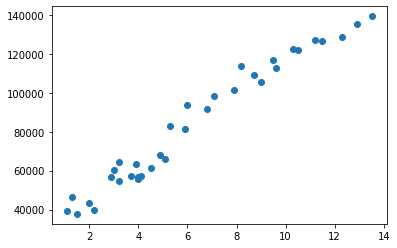

In [106]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()

- 경력과 연봉간에 선형관계가 있는 것 처럼 보임
- 선형회귀모형 적합

In [107]:
X = np.array(df['YearsExperience'], dtype=np.float32)
y = np.array(df['Salary'], dtype=np.float32)
y = np.log1p(y) # y값이 커서 log 스케일링

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print(X.shape, y.shape)

(35, 1) (35, 1)


## Split Train Valid Dataset 
- 원래는 train - valid - test로 나누는게 맞으나, 데이터 사이즈가 매우 작으므로(35개) train과 valid로만 분리

In [108]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=2021)
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)

(28, 1) (28, 1)
(7, 1) (7, 1)


## Modeling
- 손실함수(loss): MAE
- optimizer: SGD, Adam 2가지로 진행

### Model 1
- SGD, lr = 0.05
- epochs = 300 

In [109]:
model = Sequential([
    Dense(1)
])

model.compile(loss = 'mae', optimizer=SGD(learning_rate=0.05))

model.fit(train_X,
          train_y,
          validation_data=(valid_X, valid_y),
          epochs=300)


Epoch 1/300
1/1 [==============================] - 0s 305ms/step - loss: 13.4368 - val_loss: 11.0136
Epoch 2/300
1/1 [==============================] - 0s 19ms/step - loss: 11.1494 - val_loss: 9.3630
Epoch 3/300
1/1 [==============================] - 0s 21ms/step - loss: 8.8621 - val_loss: 7.7123
Epoch 4/300
1/1 [==============================] - 0s 35ms/step - loss: 6.5748 - val_loss: 6.0617
Epoch 5/300
1/1 [==============================] - 0s 21ms/step - loss: 4.6233 - val_loss: 5.2833
Epoch 6/300
1/1 [==============================] - 0s 25ms/step - loss: 4.3343 - val_loss: 5.0626
Epoch 7/300
1/1 [==============================] - 0s 24ms/step - loss: 4.3169 - val_loss: 5.1755
Epoch 8/300
1/1 [==============================] - 0s 29ms/step - loss: 4.3043 - val_loss: 5.1224
Epoch 9/300
1/1 [==============================] - 0s 24ms/step - loss: 4.2942 - val_loss: 5.0694
Epoch 10/300
1/1 [==============================] - 0s 24ms/step - loss: 4.2875 - val_loss: 5.1823
Epoch 11/300
1/

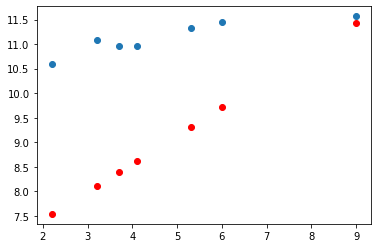

In [110]:
y_pred = model.predict(valid_X)
plt.scatter(valid_X, valid_y)
plt.scatter(valid_X, y_pred, color='r')

- 300번을 반복했어나 아직 수렴하지 않아서 lr을 키움
- lr = 0.085

In [111]:
model = Sequential([
    Dense(1)
])

model.compile(loss = 'mae', optimizer=SGD(lr=0.085))

model.fit(train_X,
          train_y,
          validation_data=(valid_X, valid_y),
          epochs=300)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
1/1 [==============================] - 0s 315ms/step - loss: 7.6298 - val_loss: 5.7037
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 4.4651 - val_loss: 5.0232
Epoch 3/300
1/1 [==============================] - 0s 24ms/step - loss: 4.3813 - val_loss: 5.2151
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 4.3513 - val_loss: 5.1249
Epoch 5/300
1/1 [==============================] - 0s 20ms/step - loss: 4.3382 - val_loss: 5.3168
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 4.3416 - val_loss: 4.9416
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 4.3248 - val_loss: 5.1335
Epoch 8/300
1/1 [==============================] - 0s 22ms/step - loss: 4.2931 - val_loss: 5.0434
Epoch 9/300
1/1 [==============================] - 0s 22ms/step - loss: 4.2817 - val_loss: 5.2353
Epoch 10/300
1/1 [==============================] - 0s 29ms/step - loss: 4.2818 - val_loss: 4.8601
Epoch 11/300
1/1 [

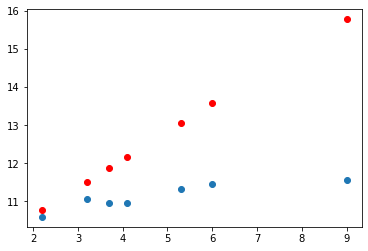

In [112]:
y_pred = model.predict(valid_X)
plt.scatter(valid_X, valid_y)
plt.scatter(valid_X, y_pred, color='r')

- lr=0.05 -> lr=0.085로 변경
- 과적합이 발생

이번에는 SGD 대신 Adam으로 진행
- lr = 0.05
- epochs = 300 (SGD 초기 조건과 동일하게 시작)

In [113]:
model = Sequential([
    Dense(1)
])

model.compile(loss = 'mae', optimizer=Adam(lr=0.05))

model.fit(train_X,
          train_y,
          validation_data=(valid_X, valid_y),
          epochs=300)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
1/1 [==============================] - 0s 365ms/step - loss: 4.4916 - val_loss: 4.9179
Epoch 2/300
1/1 [==============================] - 0s 22ms/step - loss: 4.4379 - val_loss: 5.0431
Epoch 3/300
1/1 [==============================] - 0s 20ms/step - loss: 4.3949 - val_loss: 5.2098
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 4.3567 - val_loss: 5.3232
Epoch 5/300
1/1 [==============================] - 0s 25ms/step - loss: 4.3527 - val_loss: 5.3266
Epoch 6/300
1/1 [==============================] - 0s 22ms/step - loss: 4.3367 - val_loss: 5.2611
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 4.3088 - val_loss: 5.1487
Epoch 8/300
1/1 [==============================] - 0s 23ms/step - loss: 4.2739 - val_loss: 5.0360
Epoch 9/300
1/1 [==============================] - 0s 30ms/step - loss: 4.2527 - val_loss: 4.9638
Epoch 10/300
1/1 [==============================] - 0s 26ms/step - loss: 4.2373 - val_loss: 4.9246
Epoch 11/300
1/1 [

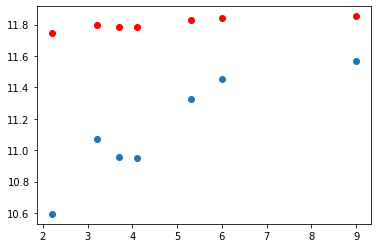

In [114]:
y_pred = model.predict(valid_y)
plt.scatter(valid_X, valid_y)
plt.scatter(valid_X, y_pred, color='r')

- underfit이 있는 것 같음
- lr = 0.05 -> lr = 0.09
- epochs = 300 -> epochs = 200

In [115]:
model = Sequential([
    Dense(1)
])

model.compile(loss = 'mae', optimizer=Adam(lr=0.09))

model.fit(train_X,
          train_y,
          validation_data=(valid_X, valid_y),
          epochs=200,
          )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
1/1 [==============================] - 0s 351ms/step - loss: 17.8225 - val_loss: 15.2812
Epoch 2/200
1/1 [==============================] - 0s 22ms/step - loss: 17.1305 - val_loss: 14.7605
Epoch 3/200
1/1 [==============================] - 0s 24ms/step - loss: 16.4385 - val_loss: 14.2398
Epoch 4/200
1/1 [==============================] - 0s 20ms/step - loss: 15.7464 - val_loss: 13.7191
Epoch 5/200
1/1 [==============================] - 0s 21ms/step - loss: 15.0544 - val_loss: 13.1984
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 14.3623 - val_loss: 12.6777
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 13.6703 - val_loss: 12.1570
Epoch 8/200
1/1 [==============================] - 0s 24ms/step - loss: 12.9783 - val_loss: 11.6362
Epoch 9/200
1/1 [==============================] - 0s 21ms/step - loss: 12.2862 - val_loss: 11.1155
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 11.5942 - val_loss: 10.594

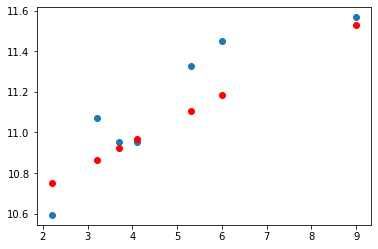

In [116]:
y_pred = model.predict(valid_X)
plt.scatter(valid_X, valid_y)
plt.scatter(valid_X, y_pred, color='r')


- SGD보다 어느정도 정확도가 높아짐